# Data Exploration

In [3]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

import random

from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_percentage_error

import xgboost as xgb


%matplotlib inline

sns.set_style("white")
matplotlib.rc('xtick', labelsize=15)
matplotlib.rc('ytick', labelsize=15)
plt.rcParams['figure.figsize'] = [16.0, 10.0]

In [4]:
dates = [
    '201902', '201903', '201904', '201905', '201907', '201908', '201909',
    '201910', '201911', '202001', '202002', '202003', '202004', '202005',
    '202007', '202008', '202009', '202010', '202011'
]

p = 0.03
bc_dataframe = []
for date in dates:
    df = pd.read_csv(
             f"train_{date}_cleaned.csv",
             header=0,
             skiprows=lambda i: i>0 and random.random() > p
    ).drop("Unnamed: 0", axis=1)
    bc_dataframe.append(df)
bc_dataframe = pd.concat(bc_dataframe, axis=0)

In [4]:
bc_dataframe

,periodo,id_cli,edad,genero,estado_civil,ult_actual,ind_mora_vigente,departamento_residencia,mora_max,cupo_total_tc,...,cuota_tc_mdo,saldo_no_rot_mdo,cuota_libranza_sf,cant_oblig_tot_sf,ind,rep_calif_cred,convenio_lib,ingreso_nomina,ingreso_segurida_social,gasto_familiar
0,201902,2249121,42,M,CAS,20181025,N,CUNDINAMARCA,NApl,0.0,...,222000.0,38593000.0,0.0,8,-1.091176e+06,B,S,2009941.5,0.0,460328.00
1,201902,4789999,35,M,SOL,20180112,N,CUNDINAMARCA,NApl,0.0,...,0.0,58888000.0,0.0,1,-6.321409e+04,H,N,0.0,0.0,160300.00
2,201902,310820,37,F,SOL,20181204,N,BOGOTA D.C.,Entre 0 y 30 dias,18000000.0,...,0.0,163000.0,0.0,7,6.576098e+06,A,N,0.0,0.0,1289521.00
3,201902,3905021,28,F,SOL,20180824,N,BOGOTA D.C.,Entre 0 y 30 dias,0.0,...,2333000.0,17821000.0,0.0,5,-2.011812e+05,D,N,1840000.0,0.0,0.00
4,201902,2917060,25,M,SOL,20180824,N,ATLANTICO,NApl,0.0,...,0.0,0.0,0.0,0,2.894675e+06,NApl,N,0.0,0.0,299588.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11007,202011,6044554,23,F,SOL,20191228,N,BOGOTA D.C.,Entre 0 y 30 dias,1900000.0,...,0.0,2403000.0,0.0,4,1.723081e+06,B,S,2227125.0,0.0,547680.00
11008,202011,3830013,26,M,SOL,20200703,N,SIN INFORMACION,Entre 0 y 30 dias,6100000.0,...,0.0,0.0,0.0,0,1.042013e+06,B,N,0.0,1500000.0,1162167.62
11009,202011,2057142,60,F,DIV,20190723,N,ANTIOQUIA,NApl,0.0,...,42000.0,0.0,0.0,3,3.273440e+05,G,N,0.0,0.0,252362.00
11010,202011,1241037,58,F,UL,20191211,N,ANTIOQUIA,Entre 0 y 30 dias,0.0,...,0.0,52000.0,0.0,1,-3.086517e+05,H,N,0.0,1069390.0,114569.40


In [13]:
bc_dataframe.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 210123 entries, 0 to 11011
Data columns (total 39 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   periodo                        210123 non-null  int64  
 1   id_cli                         210123 non-null  int64  
 2   edad                           210123 non-null  int64  
 3   genero                         210123 non-null  object 
 4   estado_civil                   210123 non-null  object 
 5   ult_actual                     210123 non-null  int64  
 6   ind_mora_vigente               210123 non-null  object 
 7   departamento_residencia        210123 non-null  object 
 8   mora_max                       210123 non-null  object 
 9   cupo_total_tc                  210123 non-null  float64
 10  cuota_tc_bancolombia           210123 non-null  float64
 11  nro_tot_cuentas                210123 non-null  int64  
 12  ctas_activas                   

<AxesSubplot:>

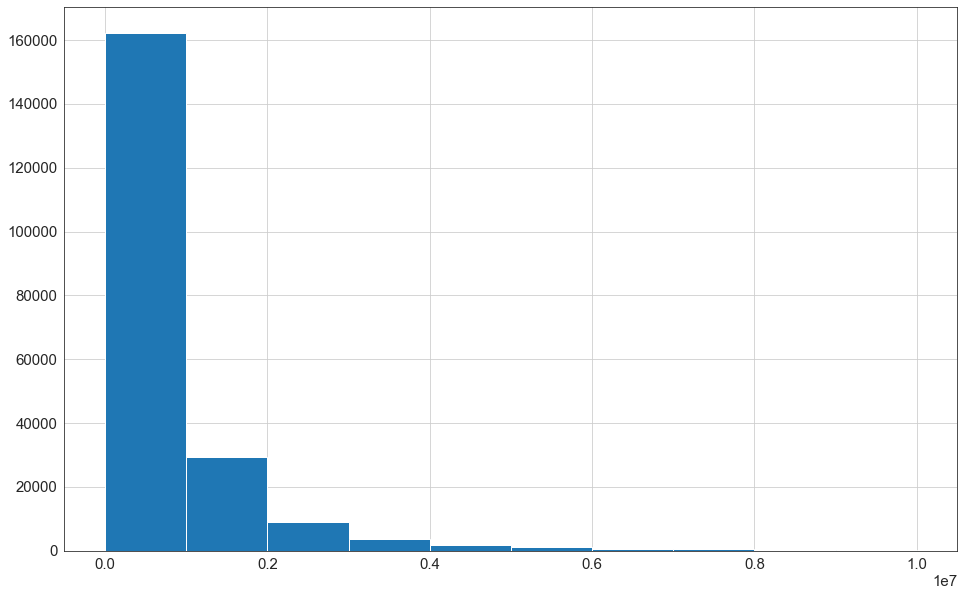

In [5]:
bc_dataframe[(bc_dataframe['gasto_familiar'] < 10000000) &
             (bc_dataframe['gasto_familiar'] >= 0)]['gasto_familiar'].hist()

<AxesSubplot:>

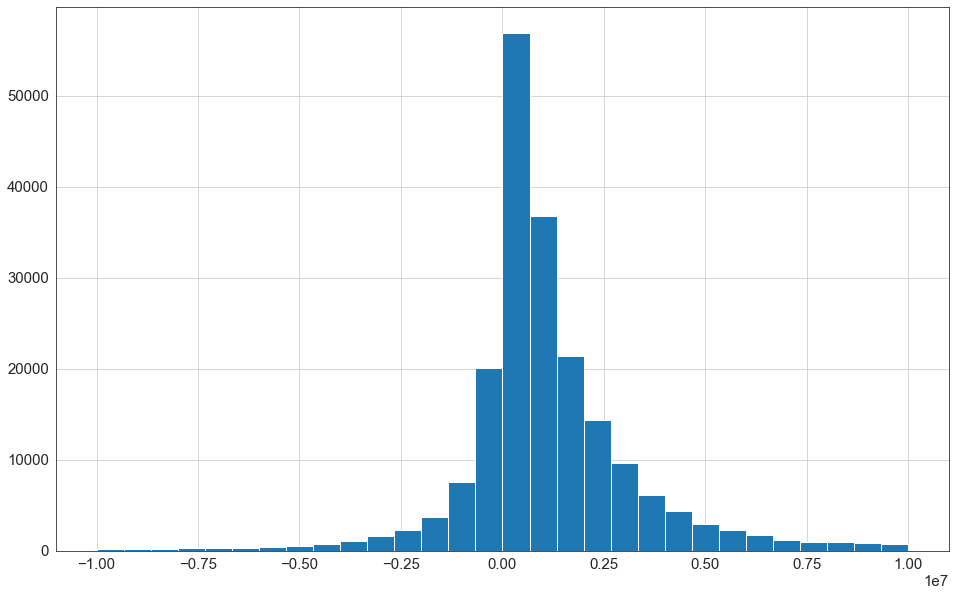

In [40]:
bc_dataframe[(bc_dataframe['ind'] >=-10000000) &
            (bc_dataframe['ind'] < 10000000)]['ind'].hist(bins=30)

<AxesSubplot:>

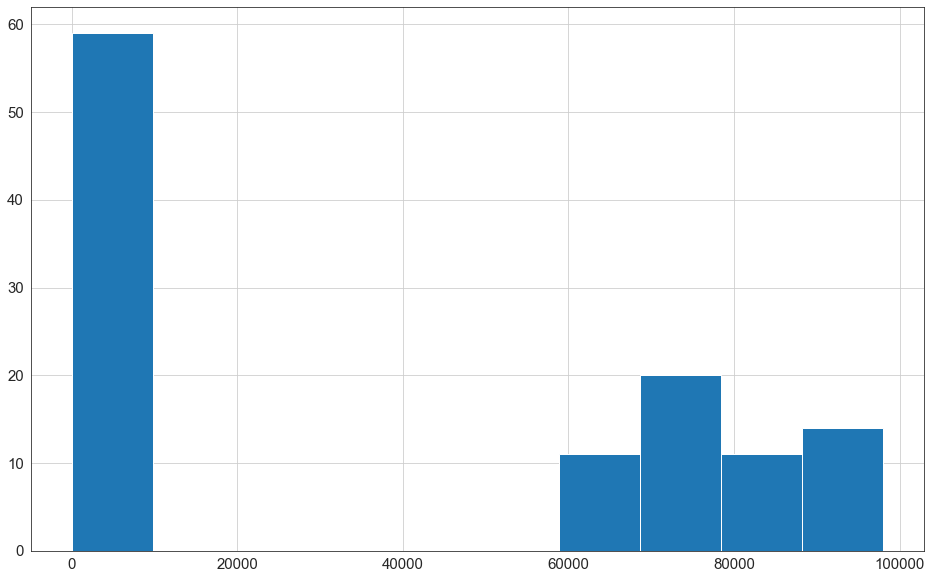

In [49]:
bc_dataframe[(bc_dataframe['ingreso_final'] < 100000)]['ingreso_final'].hist()

In [90]:
pct_spending=len(bc_dataframe[(bc_dataframe['gasto_familiar'] < 10000000) &
             (bc_dataframe['gasto_familiar'] >= 0)]['gasto_familiar']) / len(bc_dataframe)
print(f"Porcentaje de personas con gastos familiares entre 0 y 10 millones: {pct_spending}")

Porcentaje de personas con gastos familiares entre 0 y 10 millones: 0.9955978165169924


<AxesSubplot:>

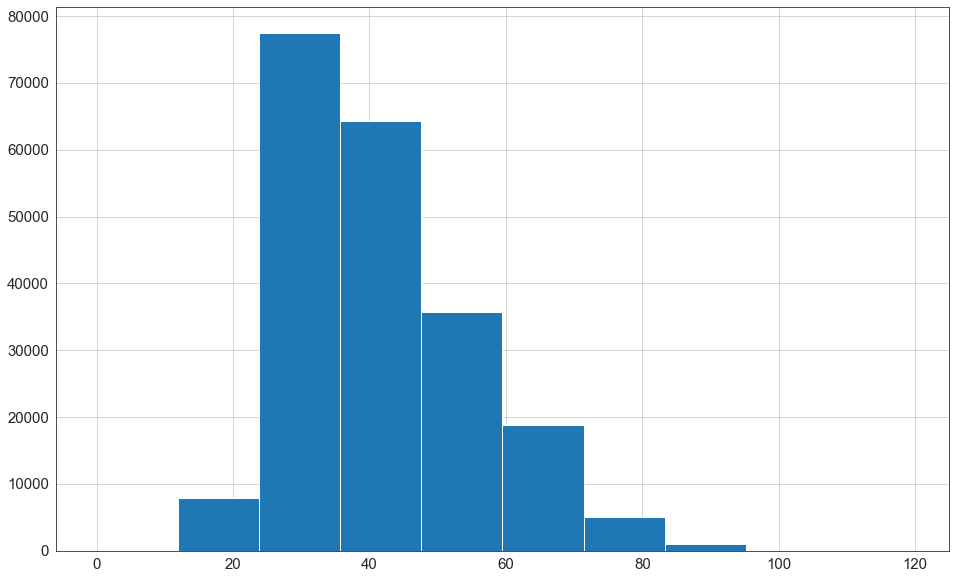

In [7]:
bc_dataframe['edad'].hist()

g:\mi unidad\packen\data analysis\python\p_projects\bc-dataton\venv\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='edad', ylabel='gasto_familiar'>

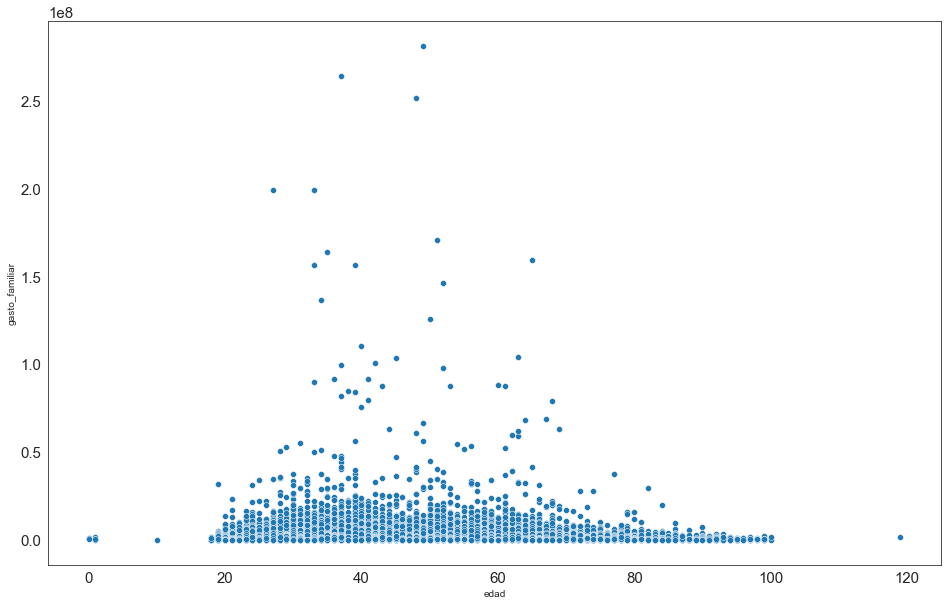

In [8]:
sns.scatterplot(bc_dataframe['edad'], bc_dataframe['gasto_familiar'])

<AxesSubplot:xlabel='genero'>

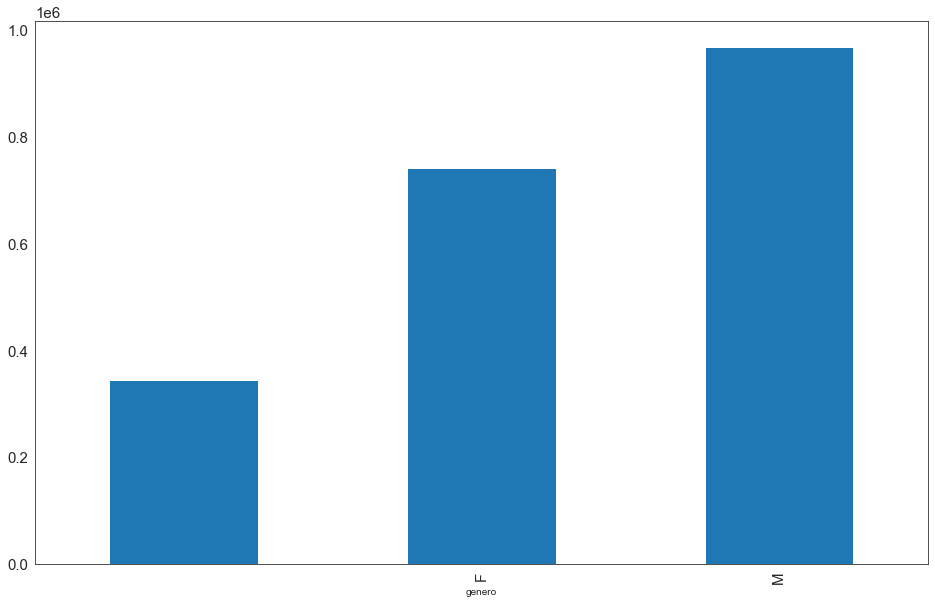

In [17]:
bc_dataframe.groupby('genero')['gasto_familiar'].mean().plot(kind='bar')

In [22]:
bc_dataframe[bc_dataframe['gasto_familiar'] < 0]

,periodo,id_cli,edad,genero,estado_civil,ult_actual,ind_mora_vigente,departamento_residencia,mora_max,cupo_total_tc,...,cuota_tc_mdo,saldo_no_rot_mdo,cuota_libranza_sf,cant_oblig_tot_sf,ind,rep_calif_cred,convenio_lib,ingreso_nomina,ingreso_segurida_social,gasto_familiar


<AxesSubplot:>

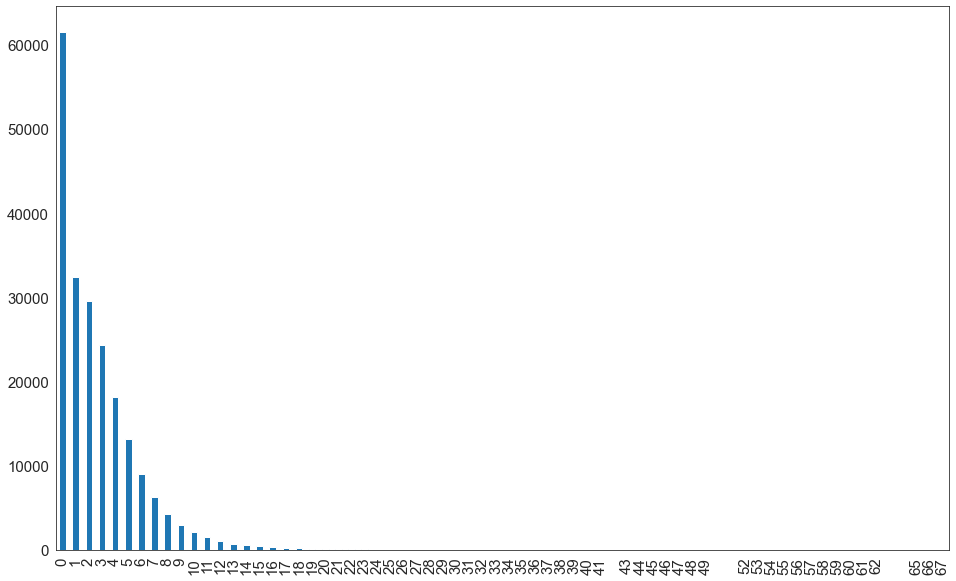

In [32]:
bc_dataframe['cant_oblig_tot_sf'].value_counts().plot(kind='bar')

In [53]:
bc_dataframe[bc_dataframe['gasto_familiar'] == 0]

,periodo,id_cli,edad,genero,estado_civil,ult_actual,ind_mora_vigente,departamento_residencia,mora_max,cupo_total_tc,...,cuota_tc_mdo,saldo_no_rot_mdo,cuota_libranza_sf,cant_oblig_tot_sf,ind,rep_calif_cred,convenio_lib,ingreso_nomina,ingreso_segurida_social,gasto_familiar
3,201902,3905021,28,F,SOL,20180824,N,BOGOTA D.C.,Entre 0 y 30 dias,0.0,...,2333000.0,17821000.0,0.0,5,-2.011812e+05,D,N,1840000.0,0.0,0.0
22,201902,2114397,44,F,SOL,20180906,N,CUNDINAMARCA,NApl,0.0,...,0.0,64124000.0,0.0,1,5.457897e+05,B,N,0.0,0.0,0.0
31,201902,8132417,58,M,CAS,20180823,N,CORDOBA,Entre 0 y 30 dias,7300000.0,...,237000.0,1721000.0,0.0,6,1.435327e+04,C,N,0.0,0.0,0.0
45,201902,8167939,69,F,NI,20180817,N,BOGOTA D.C.,Entre 0 y 30 dias,0.0,...,0.0,131769000.0,0.0,1,-5.671765e+05,H,N,0.0,0.0,0.0
51,201902,966757,38,F,SOL,20181023,N,ESTADO EXTERIOR,NApl,0.0,...,0.0,0.0,0.0,0,1.147500e+05,NApl,N,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10936,202011,1503360,38,F,SOL,20200803,S,VALLE,Entre 0 y 30 dias,0.0,...,0.0,46000.0,0.0,2,-6.752020e+05,G,N,1719000.0,1200000.0,0.0
10945,202011,164784,46,F,NI,20190117,N,BOGOTA D.C.,NApl,0.0,...,16000.0,3517000.0,0.0,2,3.998452e+05,H,S,1047036.0,1331000.0,0.0
10970,202011,2085434,39,F,UL,20190722,N,BOLIVAR,Entre 0 y 30 dias,0.0,...,470000.0,96120000.0,0.0,7,-4.103800e+05,D,N,0.0,828116.0,0.0
10985,202011,909574,40,M,CAS,20200617,N,ATLANTICO,NApl,0.0,...,0.0,0.0,0.0,0,2.439291e+06,C,N,0.0,4099648.0,0.0


In [63]:
bc_dataframe['ingreso_calculado'] =  bc_dataframe['ingreso_segurida_social']  + bc_dataframe['ingreso_nompen'] 

In [66]:
bc_dataframe[['ingreso_calculado', 'ingreso_final']]

,ingreso_calculado,ingreso_final
0,2632226.0,2.827421e+06
1,0.0,1.701541e+06
2,0.0,1.052586e+07
3,1840000.0,2.745875e+06
4,0.0,4.865000e+06
...,...,...
11007,2462702.0,3.213373e+06
11008,1500000.0,5.353454e+06
11009,0.0,1.577280e+06
11010,1069390.0,1.069390e+06


g:\mi unidad\packen\data analysis\python\p_projects\bc-dataton\venv\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='ingreso_final', ylabel='ingreso_calculado'>

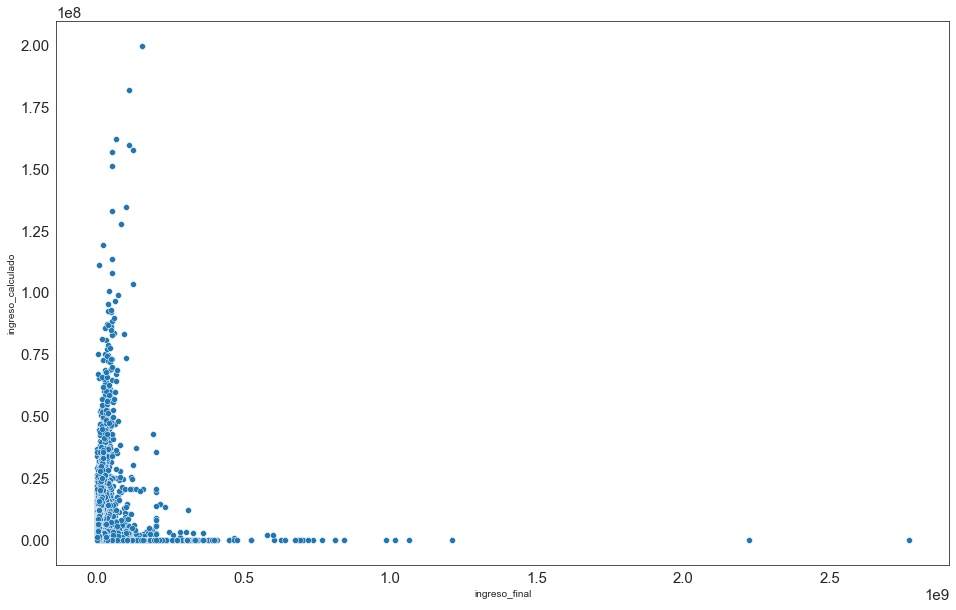

In [64]:
bc_dataframe[['ingreso_nompen', 'ingreso_nomina']]
sns.scatterplot(bc_dataframe['ingreso_final'], bc_dataframe['ingreso_calculado'])

g:\mi unidad\packen\data analysis\python\p_projects\bc-dataton\venv\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:ylabel='gasto_familiar'>

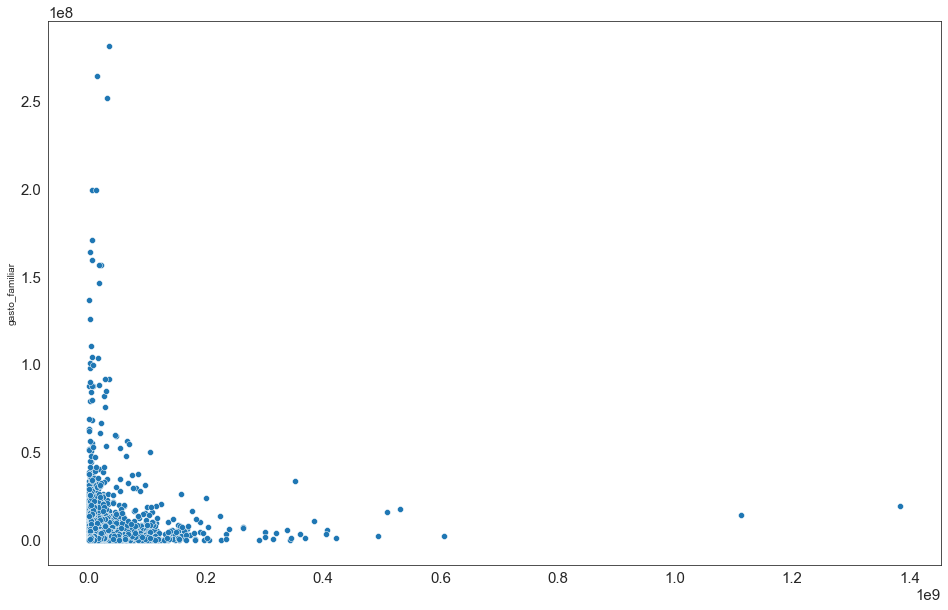

In [69]:
sns.scatterplot((bc_dataframe['ingreso_calculado'] + bc_dataframe['ingreso_final'])/2, bc_dataframe['gasto_familiar'])

In [62]:
bc_dataframe[bc_dataframe['cat_ingreso'] == "NOM"][['cat_ingreso','ingreso_nompen', 'ingreso_nomina']]

,cat_ingreso,ingreso_nompen,ingreso_nomina
0,NOM,2632226.0,2009941.5
3,NOM,1840000.0,1840000.0
7,NOM,18057540.0,5547700.0
8,NOM,2826718.0,3113016.0
12,NOM,2744866.0,2746783.0
...,...,...,...
11000,NOM,3076221.0,3151361.0
11002,NOM,5921587.0,0.0
11005,NOM,1428000.0,0.0
11007,NOM,2462702.0,2227125.0


In [60]:
bc_dataframe['cat_ingreso'].value_counts()

OTROS      126998
NOM         70901
PEN         11521
NOM PEN       703
Name: cat_ingreso, dtype: int64

# Preprocessing class

In [6]:
class DataFramePreProcessor:
    
    def __init__(self, dataframe, test=False):
        self.test = test
        self.original_dataframe = dataframe.copy()
        self.modeling_dataframe = None
    
    
    def handleMissingData(self, dataframe):
        dataframe['ingreso_final'] = dataframe['ingreso_final'].fillna(0)
        dataframe['ind'] = dataframe['ind'].fillna(0)
        return dataframe
    
    # Borrar filas deacuerdo a cierta logica de negocio
    def rowFilter(self, dataframe):
        return dataframe[
            (dataframe['edad'] < 80) &
            (dataframe['gasto_familiar'] >= 0) &
            (dataframe['gasto_familiar'] < 10000000) &
            (dataframe['cant_oblig_tot_sf'] < 13) &
            (dataframe['cuota_de_consumo'] >= 0)
 
        ] 
    
    def oneEncodeVariables(self):
        pass
    
    def newVars(self, dataframe):
        pct_vars = [
            'cuota_cred_hipot',
            'cuota_tarjeta_de_credito',
            'cuota_de_consumo',
            'cuota_rotativos',
            'cuota_sector_real_comercio',
            'cuota_de_sector_solidario',
            'cuota_tc_bancolombia',
            'cuota_libranza_sf'
        ]
        
        cat_vars = [
            'mora_max'
        ]
        
        dummified = []
        for var in cat_vars:
            dummified.append(
                pd.get_dummies(dataframe[var], drop_first=True, prefix=var)
            )
        
        dummified = pd.concat(dummified, axis=1)
        dataframe = pd.concat([dataframe.drop(cat_vars, axis=1),dummified], axis=1)
        for var in pct_vars:
            dataframe[f"{var}_pct"] = dataframe[var] / dataframe['ingreso_final'] 
            dataframe[f"{var}_pct"] = dataframe[f"{var}_pct"].replace(dict.fromkeys([np.nan, np.inf], 0))
            
        dataframe['genero'] = np.where(dataframe['genero'] == 'M', 0, 1)
        dataframe['ind_mora_vigente'] = np.where(dataframe['ind_mora_vigente'] == "S", 1, 0)
        dataframe['convenio_lib'] = np.where(dataframe['convenio_lib'] == 'S', 1, 0)
        dataframe['ingreso_calculado'] =  dataframe['ingreso_segurida_social']  + dataframe['ingreso_nompen'] 
        dataframe['ind_annio'] = dataframe['periodo'].apply(lambda x: 1 if str(x)[:4] == '2020' else 0)
        if not self.test:
            dataframe['log_gasto_familiar'] = np.log(dataframe['gasto_familiar'] +1 ) 
        return dataframe
    
    def process(self):
        
        complete_df = self.handleMissingData(self.original_dataframe)
        if not self.test:
            filtered_df = self.rowFilter(complete_df)
            grown_df    = self.newVars(filtered_df)
        else:
            grown_df    = self.newVars(complete_df)
        self.modeling_dataframe = grown_df
        
        return self.modeling_dataframe
        

In [7]:
fe_dataframe = DataFramePreProcessor(bc_dataframe)

In [8]:
fe_dataframe.process()

,periodo,id_cli,edad,genero,estado_civil,ult_actual,ind_mora_vigente,departamento_residencia,cupo_total_tc,cuota_tc_bancolombia,...,cuota_tarjeta_de_credito_pct,cuota_de_consumo_pct,cuota_rotativos_pct,cuota_sector_real_comercio_pct,cuota_de_sector_solidario_pct,cuota_tc_bancolombia_pct,cuota_libranza_sf_pct,ingreso_calculado,ind_annio,log_gasto_familiar
0,201902,4773974,23,0,SOL,20181130,0,ANTIOQUIA,0.0,0.000000e+00,...,0.000000,0.200639,0.0,0.192235,0.000000,0.000000,0.200639,2431211.0,0,12.408893
1,201902,2091131,52,1,SOL,20180911,0,BOGOTA D.C.,25000000.0,1.485756e+06,...,0.224552,0.225987,0.0,0.000000,0.000000,0.177557,0.164321,16028757.0,0,12.292457
2,201902,1589502,36,1,UL,20180921,0,BOGOTA D.C.,1000000.0,1.000779e+05,...,0.000000,0.000000,0.0,0.066324,0.032503,0.043957,0.000000,1840000.0,0,10.559737
3,201902,2908221,28,0,SOL,20180414,0,ANTIOQUIA,0.0,0.000000e+00,...,0.000000,0.000000,0.0,2.500000,0.000000,0.000000,0.000000,0.0,0,11.982685
4,201902,1259445,59,1,SOL,20170520,0,BOLIVAR,0.0,0.000000e+00,...,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32971,202011,4696472,28,1,SOL,20200619,0,RISARALDA,0.0,0.000000e+00,...,0.000000,0.526154,0.0,0.000000,0.201538,0.000000,0.000000,5184700.0,1,12.555440
32972,202011,5054485,29,1,SOL,20200811,0,VALLE,0.0,0.000000e+00,...,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,1,12.815653
32973,202011,3493032,27,1,SOL,20200902,0,ANTIOQUIA,0.0,0.000000e+00,...,0.000000,0.301402,0.0,0.000000,0.000000,0.000000,0.000000,0.0,1,10.896758
32974,202011,616072,39,0,CAS,20200111,0,CUNDINAMARCA,0.0,0.000000e+00,...,0.150448,0.531289,0.0,0.000000,0.000000,0.000000,0.000000,3733640.0,1,14.181314


# Modeling

In [433]:
fe_dataframe.modeling_dataframe.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 608776 entries, 0 to 33145
Data columns (total 52 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   periodo                         608776 non-null  int64  
 1   id_cli                          608776 non-null  int64  
 2   edad                            608776 non-null  int64  
 3   genero                          608776 non-null  int32  
 4   estado_civil                    608776 non-null  object 
 5   ult_actual                      608776 non-null  int64  
 6   ind_mora_vigente                608776 non-null  int32  
 7   departamento_residencia         608776 non-null  object 
 8   cupo_total_tc                   608776 non-null  float64
 9   cuota_tc_bancolombia            608776 non-null  float64
 10  nro_tot_cuentas                 608776 non-null  int64  
 11  ctas_activas                    608776 non-null  int64  
 12  cuota_cred_hipot 

In [9]:
feature_cols = [
    'ingreso_final',
    'cuota_cred_hipot_pct',
    'cupo_total_tc', 
    'cuota_tarjeta_de_credito_pct',
    'cuota_de_consumo_pct',
    'cuota_rotativos_pct',
    #'cuota_libranza_sf_pct',
    'genero',
    'cuota_de_sector_solidario_pct',
    'cuota_sector_real_comercio_pct',
    'ind_mora_vigente',
    'ind_annio',
    'cuota_tc_bancolombia_pct',
    'cupo_tc_mdo',
    'convenio_lib',
    'cant_oblig_tot_sf',
    'edad'
]
X = fe_dataframe.modeling_dataframe[feature_cols]
y = fe_dataframe.modeling_dataframe['gasto_familiar']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [439]:
xgb_reg = xgb.XGBRegressor(objective='reg:squarederror', n_estimators=10, random_state=101)
xgb_reg.fit(X_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=10, n_jobs=8, num_parallel_tree=1, random_state=101,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

<AxesSubplot:title={'center':'Feature importance'}, xlabel='F score', ylabel='Features'>

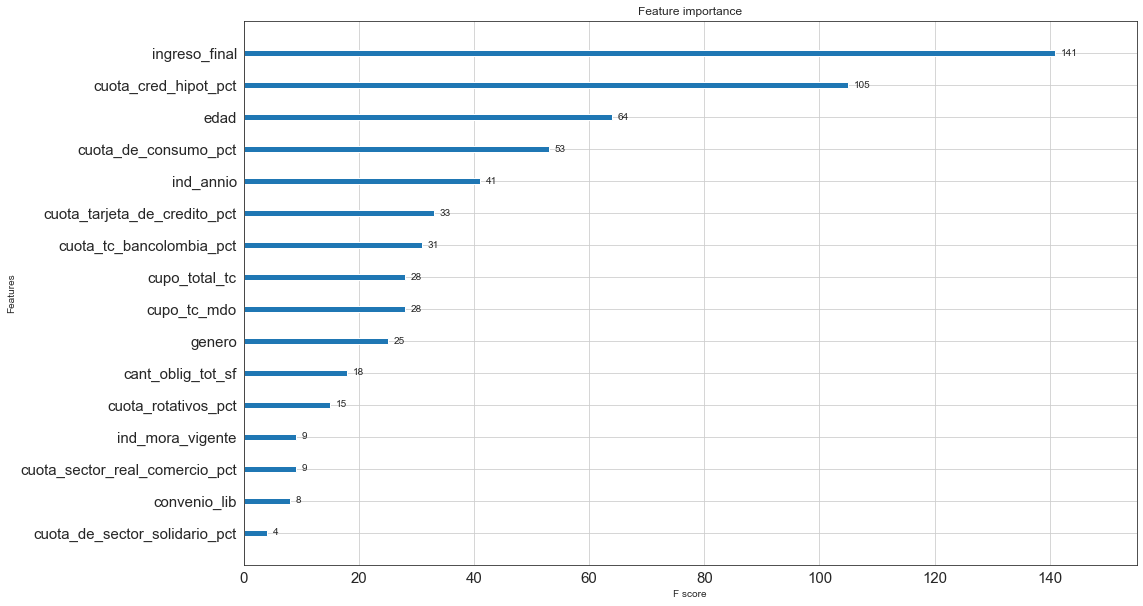

In [440]:
xgb.plot_importance(xgb_reg)

In [441]:
y_pred = xgb_reg.predict(X_test)
mean_absolute_percentage_error(y_pred, y_test)

0.7853530879517547

In [12]:
import optuna 
import joblib
from optuna import Trial, visualization
from optuna.samplers import TPESampler

In [22]:
def objective(trial: Trial,X,y) -> float:
    
    joblib.dump(study, 'study.pkl')
    
    train_X,test_X,train_y,test_y = train_test_split(X, y, test_size = 0.30,random_state = 101)

    param = {
                "n_estimators" : trial.suggest_int('n_estimators', 0, 100),
                'max_depth':trial.suggest_int('max_depth', 2, 10),
                'reg_alpha':trial.suggest_int('reg_alpha', 0, 5),
                'reg_lambda':trial.suggest_int('reg_lambda', 0, 5),
                'min_child_weight':trial.suggest_int('min_child_weight', 0, 5),
                'gamma':trial.suggest_int('gamma', 0, 5),
                'learning_rate':trial.suggest_loguniform('learning_rate',0.01,0.5),
                'colsample_bytree':trial.suggest_discrete_uniform('colsample_bytree',0.1,1,0.01),
                'nthread' : -1
            }
    model = xgb.XGBRegressor(**param)

    model.fit(train_X,train_y)
    predictions = model.predict(test_X)

    return mean_absolute_percentage_error(predictions,test_y)    

In [ ]:
study = optuna.create_study(direction='minimize',sampler=TPESampler())
study.optimize(lambda trial : objective(trial,X,y),n_trials= 50)

[I 2021-01-18 23:24:07,109] A new study created in memory with name: no-name-46910b61-5d92-4a2d-a9e6-bc4de94721bd
[I 2021-01-18 23:24:14,908] Trial 0 finished with value: 0.7787417803726742 and parameters: {'n_estimators': 88, 'max_depth': 3, 'reg_alpha': 5, 'reg_lambda': 1, 'min_child_weight': 3, 'gamma': 2, 'learning_rate': 0.18243786510964985, 'colsample_bytree': 0.15000000000000002}. Best is trial 0 with value: 0.7787417803726742.
[I 2021-01-18 23:24:17,103] Trial 1 finished with value: 5.4392465611354766 and parameters: {'n_estimators': 13, 'max_depth': 3, 'reg_alpha': 5, 'reg_lambda': 0, 'min_child_weight': 0, 'gamma': 3, 'learning_rate': 0.012820118466895904, 'colsample_bytree': 0.29000000000000004}. Best is trial 0 with value: 0.7787417803726742.
[I 2021-01-18 23:24:36,143] Trial 2 finished with value: 0.892475127068634 and parameters: {'n_estimators': 55, 'max_depth': 9, 'reg_alpha': 0, 'reg_lambda': 1, 'min_child_weight': 0, 'gamma': 0, 'learning_rate': 0.02853160325615753, '

[I 2021-01-18 23:34:16,880] Trial 25 finished with value: 0.7736181063130506 and parameters: {'n_estimators': 68, 'max_depth': 8, 'reg_alpha': 1, 'reg_lambda': 2, 'min_child_weight': 2, 'gamma': 0, 'learning_rate': 0.0766003885927167, 'colsample_bytree': 0.79}. Best is trial 15 with value: 0.7717518340834683.
[I 2021-01-18 23:34:35,335] Trial 26 finished with value: 0.7720435849066403 and parameters: {'n_estimators': 82, 'max_depth': 4, 'reg_alpha': 2, 'reg_lambda': 3, 'min_child_weight': 1, 'gamma': 2, 'learning_rate': 0.10963863269045505, 'colsample_bytree': 0.5700000000000001}. Best is trial 15 with value: 0.7717518340834683.
[I 2021-01-18 23:34:52,173] Trial 27 finished with value: 0.7736925903198377 and parameters: {'n_estimators': 81, 'max_depth': 4, 'reg_alpha': 3, 'reg_lambda': 3, 'min_child_weight': 1, 'gamma': 2, 'learning_rate': 0.26193509738245097, 'colsample_bytree': 0.5}. Best is trial 15 with value: 0.7717518340834683.
[I 2021-01-18 23:35:24,608] Trial 28 finished with v

In [ ]:
print('Best trial: score {},\nparams {}'.format(study.best_trial.value,study.best_trial.params))

g:\mi unidad\packen\data analysis\python\p_projects\bc-dataton\venv\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:ylabel='log_gasto_familiar'>

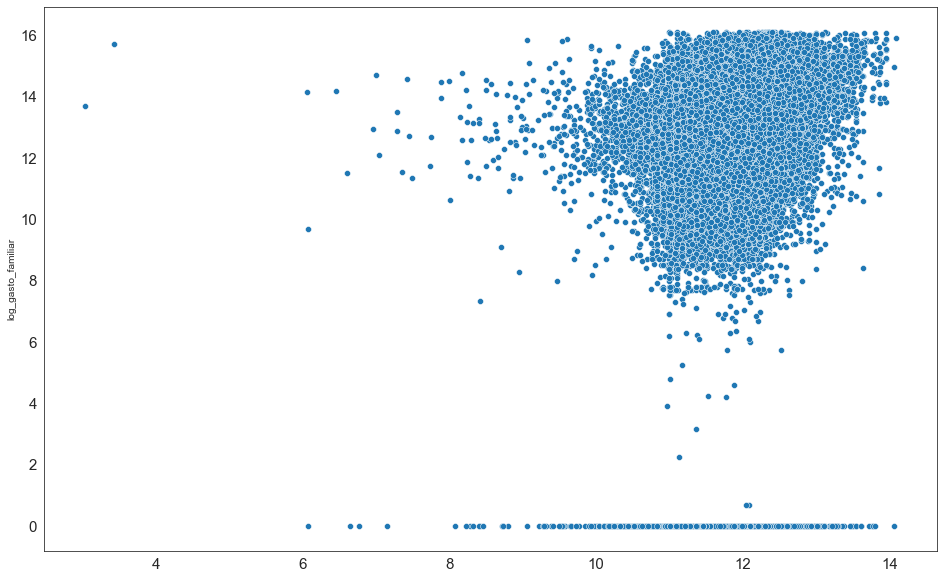

In [352]:
sns.scatterplot(y_pred, y_test)

# test

In [412]:
test_df = pd.read_csv("test_cleaned.csv").drop("Unnamed: 0", axis=1)
test_df

,id_registro,periodo,id_cli,edad,genero,estado_civil,ult_actual,ind_mora_vigente,departamento_residencia,mora_max,...,saldo_prom3_tdc_mdo,cuota_tc_mdo,saldo_no_rot_mdo,cuota_libranza_sf,cant_oblig_tot_sf,ind,rep_calif_cred,convenio_lib,ingreso_nomina,ingreso_segurida_social
0,4055#201902,201902,4055,46,M,CAS,20180807,N,ANTIOQUIA,NApl,...,2.825000e+05,19000.0,127148000.0,1797000.0,7,2.060457e+06,A,S,2734528.0,0.0
1,12598#201902,201902,12598,43,M,SOL,20180130,N,CUNDINAMARCA,Entre 0 y 30 dias,...,0.000000e+00,0.0,87661000.0,0.0,5,-7.187437e+07,H,S,2291070.0,0.0
2,23697#201902,201902,23697,45,M,CAS,20190110,N,BOGOTA D.C.,Entre 0 y 30 dias,...,3.300000e+04,33000.0,58967000.0,0.0,3,-1.448765e+06,A,S,0.0,0.0
3,23768#201902,201902,23768,58,M,NI,20180208,N,BOGOTA D.C.,NApl,...,0.000000e+00,0.0,0.0,0.0,0,2.208260e+06,G,S,0.0,0.0
4,7174#201902,201902,7174,52,F,DIV,20180825,N,BOGOTA D.C.,Entre 0 y 30 dias,...,4.088500e+06,11000.0,22746000.0,0.0,7,3.212636e+06,A,S,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
281661,8596193#202011,202011,8596193,47,F,SOL,20201010,N,ANTIOQUIA,Entre 0 y 30 dias,...,0.000000e+00,0.0,0.0,0.0,2,2.101424e+06,A,S,2281362.5,3876343.0
281662,8616083#202011,202011,8616083,35,M,NI,20201003,N,BOGOTA D.C.,Entre 0 y 30 dias,...,8.286667e+06,237000.0,99000.0,0.0,12,1.170550e+07,C,S,14510896.0,0.0
281663,8670207#202011,202011,8670207,47,M,DIV,20200616,N,CUNDINAMARCA,Entre 0 y 30 dias,...,3.091700e+07,10350000.0,300000.0,0.0,17,-4.154790e+07,D,S,0.0,0.0
281664,8677655#202011,202011,8677655,42,F,CAS,20200423,N,ANTIOQUIA,Entre 0 y 30 dias,...,3.760867e+07,1953000.0,184811000.0,0.0,18,5.313457e+06,B,S,11401109.0,14481371.0


In [414]:
test_df_modeling = DataFramePreProcessor(test_df, test=True)
test_df_modeling.process()
final_predictions=xgb_reg.predict(test_df_modeling.modeling_dataframe[feature_cols])

In [415]:
pd.Series(final_predictions)

0         8.759433e+05
1         5.552434e+05
2         9.073372e+05
3         7.502463e+05
4         1.063732e+06
              ...     
281661    7.127725e+05
281662    1.609755e+06
281663    4.483261e+06
281664    1.351738e+06
281665    1.080428e+06
Length: 281666, dtype: float32

In [417]:
submission = pd.concat([test_df['id_registro'],pd.Series(final_predictions)], axis=1)
submission.columns = ["id_registro", "gasto_familiar"]
submission

,id_registro,gasto_familiar
0,4055#201902,8.759433e+05
1,12598#201902,5.552434e+05
2,23697#201902,9.073372e+05
3,23768#201902,7.502463e+05
4,7174#201902,1.063732e+06
...,...,...
281661,8596193#202011,7.127725e+05
281662,8616083#202011,1.609755e+06
281663,8670207#202011,4.483261e+06
281664,8677655#202011,1.351738e+06


In [418]:
submission.to_csv("submission_underground.csv", index=False)

In [420]:
pd.get_dummies(test_df['mora_max'], drop_first=True, prefix="mora_max")

,mora_max_Entre 31 y 60 dias,mora_max_Mas de 60,mora_max_NApl
0,0,0,1
1,0,0,0
2,0,0,0
3,0,0,1
4,0,0,0
...,...,...,...
281661,0,0,0
281662,0,0,0
281663,0,0,0
281664,0,0,0
